In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
sys.path.append('../..')
# %matplotlib
# %matplotlib inline
import numpy
import matplotlib.pyplot as plt
import plotly.plotly as py
from scipy.integrate import odeint
import math
import random

In [2]:
import gillespy2
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver
from gillespy2.solvers.numpy.ssa_solver import NumPySSASolver
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

In [3]:
class AutomaticSwitchExample(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Automatic Switch Example")
            
            #parameters
            k1 = gillespy2.Parameter(name='k1', expression= 3e-4)
            k2 = gillespy2.Parameter(name='k2', expression= .5e-2)
            k3 = gillespy2.Parameter(name='k3', expression = 2e-1)
            self.add_parameter([k1,k2,k3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=400)
            B = gillespy2.Species(name='B', initial_value=1e4)
            C = gillespy2.Species(name='C', initial_value=1e4)
            self.add_species([A, B, C])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={B:1,C:1},
                   rate=k1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={B:1}, products={},
                    rate=k2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={A:1},
                    rate=k3)

            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,600,501))

In [4]:
model = AutomaticSwitchExample()
results = {}

In [ ]:
%time tau_hybrid_results = model.run(solver=BasicTauHybridSolver, show_labels=True, debug=False)

CPU times: user 13.6 s, sys: 547 ms, total: 14.2 s
Wall time: 13.8 s


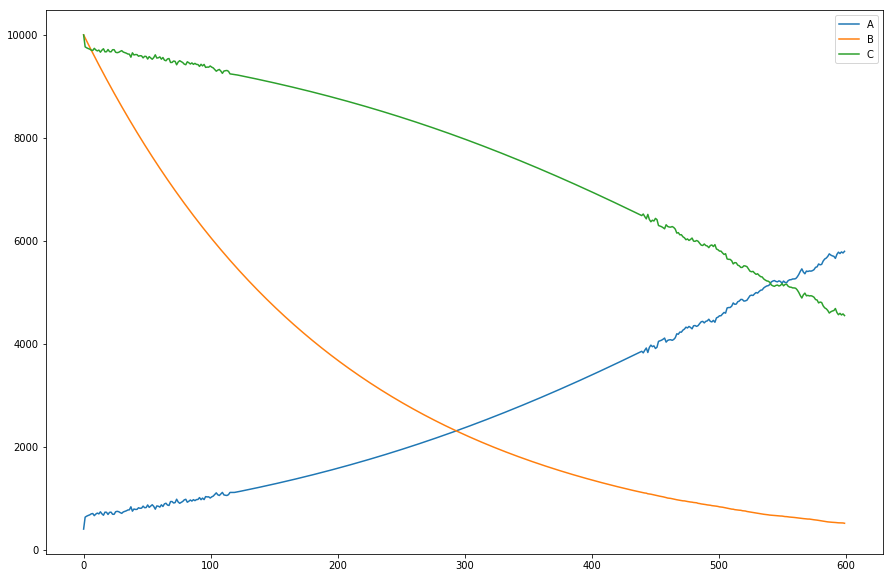

In [ ]:
plt.figure(figsize=(15, 10))
for species in tau_hybrid_results[0]:
    if species == 'time': continue
    plt.plot(tau_hybrid_results[0]['time'], tau_hybrid_results[0][species], label='{0}'.format(species))
plt.legend(loc='best')
# hyb_solv_check_plot = plt.gcf()
# py.iplot_mpl(hyb_solv_check_plot, resize=False, filename='hyb_solv_check_plot', width=960, height=1120)

In [ ]:
solvers = [BasicODESolver, NumPySSASolver]
for solver in solvers:
    %time results[solver] = model.run(solver=solver, show_labels=True)

CPU times: user 109 ms, sys: 62.5 ms, total: 172 ms
Wall time: 50.9 ms


In [ ]:
plt.figure(figsize=(15, 10))
for species in tau_hybrid_results[0]:
    if species == 'time': continue
    plt.plot(tau_hybrid_results[0]['time'], tau_hybrid_results[0][species], label='Hybrid-{0}'.format(species))
for solver in solvers:
    for trajectory in results[solver]:
        for species in trajectory:
            if species == 'time': continue
            plt.plot(results[solver][0]['time'], results[solver][0][species], label='{0}-{1}'.format(solver.name, species))
    plt.legend(loc='best')
# hyb_solv_check_plot = plt.gcf()
# py.iplot_mpl(hyb_solv_check_plot, resize=False, filename='hyb_solv_check_plot', width=960, height=1120)